<a href="https://colab.research.google.com/github/kiranmuloor/DataScience/blob/master/CNN/keras_cats_dogs_convnet_augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Keras Model with Image Augmentation and Dropout to reduce overfitting
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/dogs-vs-cats_small/train/"
validation_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/dogs-vs-cats_small/validation/"
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [4]:
#Validation Data Set should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)
#Resize all images to 150x150
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 318s 3s/step - loss: 0.6834 - acc: 0.5630 - val_loss: 0.7538 - val_acc: 0.4931
Epoch 2/100
100/100 [==============================] - 166s 2s/step - loss: 0.6747 - acc: 0.5774 - val_loss: 0.6253 - val_acc: 0.6509
Epoch 3/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6620 - acc: 0.5962 - val_loss: 0.8065 - val_acc: 0.5783
Epoch 4/100
100/100 [==============================] - 30s 295ms/step - loss: 0.6398 - acc: 0.6353 - val_loss: 0.6254 - val_acc: 0.6679
Epoch 5/100
100/100 [==============================] - 29s 294ms/step - loss: 0.6197 - acc: 0.6507 - val_loss: 0.5913 - val_acc: 0.6825
Epoch 6/100
100/100 [==============================] - 30s 297ms/step - loss: 0.6194 - acc: 0.6454 - val_loss: 0.6154 - val_acc: 0.6427
Epoch 7/100
100/100 [==============================] - 29s 294ms/step - loss: 0.6061 - acc: 0.6665 - val_loss: 0.5571 - val_acc: 0.7216
Epoch 8/100
100/100 [==============================]

In [0]:
model.save('cats_and_dogs_small_2.h5')

Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

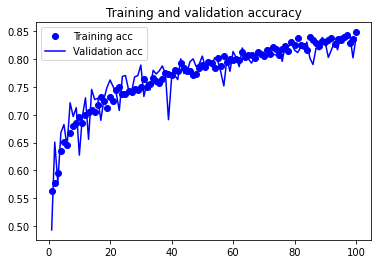

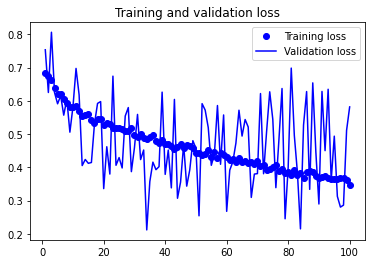

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()